In [1]:
import matplotlib as plt
import pandas as pd
pd.__version__

%matplotlib inline

In [4]:
ms = pd.read_csv('data/microsoft.csv', index_col=0)

In [5]:
ms['MA10'] = ms.Close.rolling(10).mean()
ms['MA50'] = ms.Close.rolling(50).mean()

<AxesSubplot: xlabel='Date'>

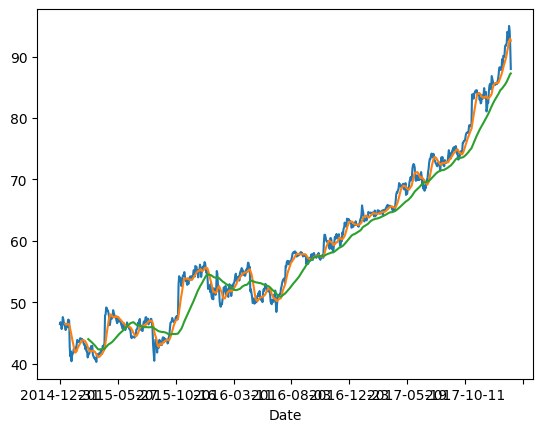

In [7]:
ms.Close.plot()
ms.MA10.plot()
ms.MA50.plot()

<AxesSubplot: xlabel='Date'>

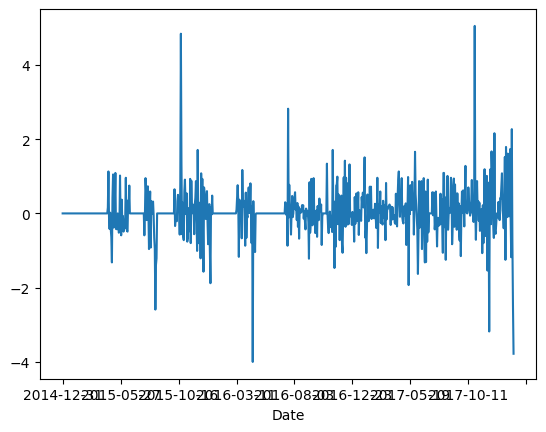

In [15]:
# If MA10 > MA50 buy and hold (long) 1 share
ms['Shares'] = [ 1 if ms.loc[ei, 'MA10'] > ms.loc[ei, 'MA50'] else 0 for ei in ms.index ]

# Compute daily profit
ms['Close1'] = ms.Close.shift(-1) # Get close price of tomorrow

# Profit is equal to tomorrow's close price minus today's. It can be positive or negative
ms['Profit'] = [ ms.loc[ei, 'Close1'] - ms.loc[ei, 'Close'] if ms.loc[ei, 'Shares'] == 1 else 0 for ei in ms.index ]

# Some days we make money, some days we lose
ms.Profit.plot()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,Wealth
Date,,,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,91.862,86.5244,1,95.010002,2.270004,30.540009
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.349,86.7606,1,94.260002,-0.750000,29.790009
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,92.765,86.9978,1,91.779999,-2.480003,27.310006
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,92.943,87.1828,1,88.000000,-3.779999,23.530007
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,92.582,87.2684,1,NaN,NaN,NaN


Total money made is: 23.53000699999999
Total money spent is: 46.450001
Buy and hold would have made: 41.549999


<AxesSubplot: xlabel='Date'>

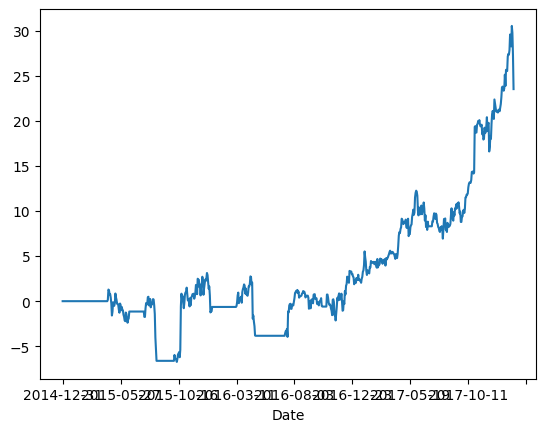

In [24]:
ms['Wealth'] = ms['Profit'].cumsum()

display(ms.tail())

print(f"Total money made is: {ms.loc[ms.index[-2], 'Wealth']}")
print(f"Total money spent is: {ms.loc[ms.index[0], 'Close']}")
print(f"Buy and hold would have made: {ms.loc[ms.index[-1], 'Close'] - ms.loc[ms.index[0], 'Close']}")

ms.Wealth.plot()